# ELG7186 - fall 2022 - Assignment 1
## Due: <strong>Wednesday Oct. 12<sup>th</sup> 2022 -- 11:59pm</strong>

The purpose of this assignment is to gain some experience working with the tools you will use throughout the course. You will learn:
- The basics of data loading and preparation
- Classification using the k-NN algorithm
- Classification using a Support Vector Machine (SVM)
- Calculation of metrics to assess the performance of your model

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you will submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


## Part 0. Dataset Preparation
To complete the assignment you will need to download the Cifar10 dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [1]:
# Prepare your dataset here and display samples here.
from keras.datasets.cifar import load_batch
from keras.utils.data_utils import get_file
from tensorflow.python.util.tf_export import keras_export
import tensorflow as tf
import keras as k
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random # u may need this library
import pandas as pd
random.seed(100) # set a seed in case you want your experiments to be consistent
Data=tf.keras.datasets.cifar10.load_data()
import numpy as np
from math import *
from decimal import Decimal

In [19]:
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = k.datasets.cifar10.load_data()
x_train, x_train_validation, y_train, y_train_validation = train_test_split(x_train,y_train, test_size=0.90, random_state=1, stratify=y_train)
x_test, m, y_test, n = train_test_split(x_test,y_test, test_size=0.90, random_state=1, stratify=y_test)
x_test.shape

(1000, 32, 32, 3)

In [12]:
x_train.shape

(5000, 32, 32, 3)

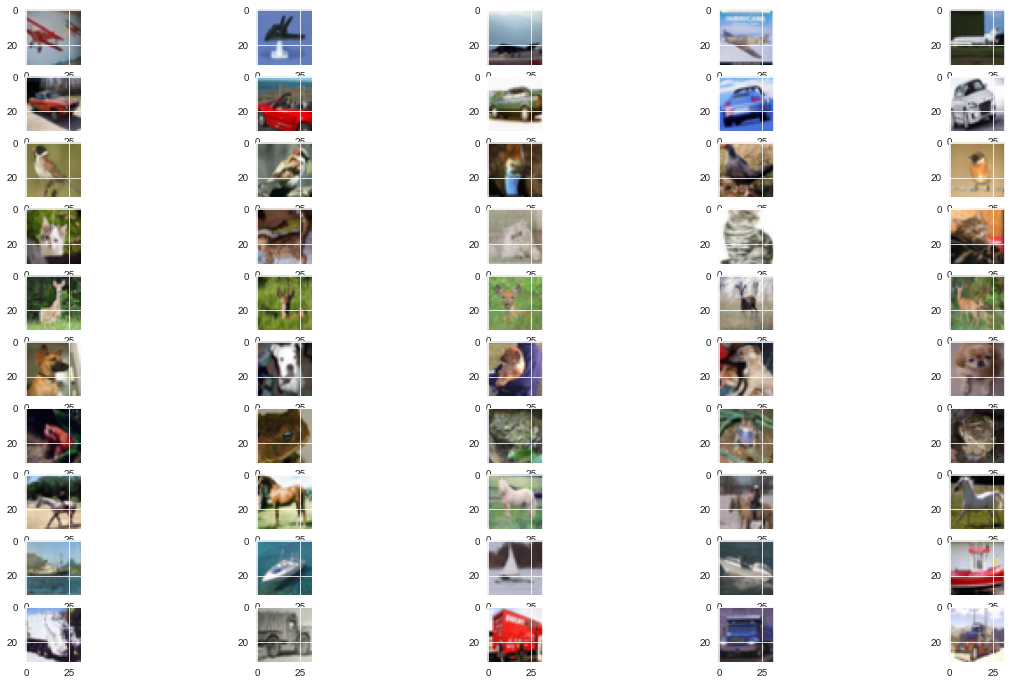

In [14]:
def draw_func(x,y):
  fig, axs = plt.subplots(10, 5,figsize=(20, 12))
  axs=axs.ravel()
  counter =0
  for ad in range(0,10):
    T=np.where(y==ad)[0]
    images=np.take(x,T[:5],axis=0)
    
    for i in range(5):
      axs[i+counter].imshow(images[i])
    counter = counter +5
  plt.show()

## Test your function using the read images here
draw_func(x_train,y_train)


## Flatten the images

In [21]:
new_x_train=x_train.reshape(500,3072)
new_x_test=x_test.reshape(1000,3072)


## Part 1. k-NN Classifier (2 Marks)
For this section you will implement a simple kNN Classifier on the Cifar10 dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results

### Bonus:

When you compute the distance metric you can acheive better performance if you vectorize the computation instead of using for loops to iterate through the values. You can earn __0.5 bonus marks__ if you only need one loop, or __1 bonus mark__ if you can omit for loops for a fully vectorized distance calculation (a maximum of 1 bonus mark is available).




In [22]:
from scipy.spatial import distance
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [23]:
class knn() :
  def __init__(self, k):
    self.k=k

  def predict(self,new_x_test,new_x_train):
    y_pred=[]
  
    for x in new_x_test:  
      comp=[]
      for xi in new_x_train:
        comp.append(distance.euclidean(x, xi))
      new_1=np.argsort(comp)
      new=[]
      count=0
      for i in new_1:
        count+=1
        if count<=self.k:
          new.append(y_train[i]) 
        else:
          break
      Data_frame=pd.DataFrame()
      Data_frame["Predicted"]=new
      y_pred.append(Data_frame.mode()['Predicted'][0][0])
    return y_pred


k=[5,7,9,11] 
accuracies= []
y_pred_array=[]
for  n in k:
  model=knn(n)
  y_pred=model.predict(new_x_test,new_x_train)
  y_pred_array.append(y_pred)
  accuracies.append(accuracy_score(y_pred,y_test))

accuracies

[0.142, 0.15, 0.133, 0.141]

<AxesSubplot:>

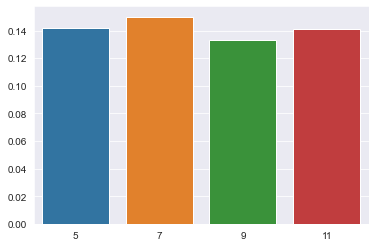

In [24]:
import seaborn as sns
sns.barplot(x=k,y=accuracies)

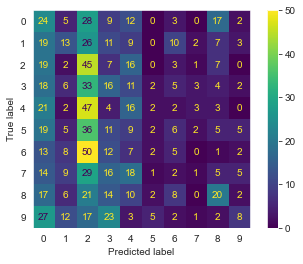

0.15


In [56]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test,y_pred_array[1])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.unique(y_test))
cm_display.plot()
plt.grid()
plt.show()
print(accuracy_score(y_test,y_pred_array[1]))


## Part 2. Logistic Regression (3 Marks)

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
y_predict_prob=[]
for x in range(10):
  Class_0=[]
  for i in range(0,len(y_train)):
    if y_train[i]==x:
      Class_0.append(1)
    else:
      Class_0.append(0)
  model=LogisticRegression(tol=0.1,max_iter=2000)
  model.fit(new_x_train,Class_0)
  y_pred=model.predict_proba(new_x_test)
  y_pred=y_pred[:,1]
  y_predict_prob.append(y_pred)
y_predict_prob=np.array(y_predict_prob)

In [29]:
y_pred_logistic=y_predict_prob.argmax(axis=0)
y_pred_logistic

array([2, 3, 6, 0, 9, 6, 0, 0, 2, 0, 1, 1, 4, 9, 4, 3, 7, 3, 6, 6, 0, 2,
       3, 8, 4, 6, 9, 3, 2, 4, 3, 4, 8, 0, 1, 2, 6, 1, 6, 8, 9, 1, 5, 2,
       2, 4, 3, 9, 8, 9, 3, 4, 6, 1, 0, 0, 9, 3, 1, 1, 7, 7, 8, 8, 8, 9,
       0, 5, 1, 7, 3, 7, 2, 0, 2, 4, 4, 1, 9, 9, 4, 9, 4, 0, 0, 6, 5, 9,
       0, 1, 3, 3, 3, 0, 5, 7, 9, 0, 6, 2, 8, 3, 9, 4, 0, 6, 0, 5, 5, 4,
       8, 7, 2, 9, 0, 0, 2, 8, 6, 5, 8, 4, 0, 2, 9, 0, 4, 9, 9, 8, 6, 0,
       9, 2, 2, 7, 2, 2, 2, 0, 5, 4, 6, 6, 0, 4, 4, 2, 2, 4, 6, 2, 3, 2,
       5, 8, 2, 2, 9, 5, 0, 4, 3, 4, 8, 6, 2, 2, 0, 6, 4, 9, 3, 4, 4, 0,
       6, 1, 3, 5, 8, 2, 0, 9, 4, 4, 8, 0, 0, 0, 6, 1, 6, 8, 6, 6, 4, 2,
       0, 8, 1, 4, 0, 2, 3, 9, 0, 7, 7, 5, 9, 0, 4, 2, 2, 0, 3, 4, 8, 5,
       2, 4, 0, 6, 8, 2, 7, 2, 3, 2, 6, 8, 3, 5, 7, 8, 0, 8, 8, 8, 2, 1,
       8, 7, 3, 4, 8, 3, 6, 2, 7, 2, 0, 2, 8, 9, 7, 0, 1, 2, 6, 9, 3, 2,
       4, 4, 5, 0, 9, 5, 9, 9, 8, 9, 4, 4, 7, 8, 3, 3, 2, 2, 0, 8, 4, 8,
       9, 1, 8, 6, 2, 8, 3, 3, 1, 4, 4, 6, 6, 3, 1,

In [30]:
accuracy_score(y_pred_logistic,y_test)

0.246

0.246


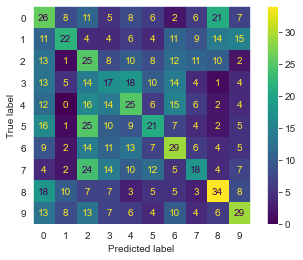

In [32]:
cm = confusion_matrix(  y_test,y_pred_logistic, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
 display_labels=np.unique(y_test))
print(accuracy_score(y_test,y_pred_logistic))
disp.plot()
plt.grid()
plt.show()

## Part 3. Support Vector Machine (SVM) Classification (4 Marks)

In Part 3. you will use Scikit-learn to perform classification, again on the Cifar10 dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.

### Bonus Mark
Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

In [38]:
y_train=y_train.reshape(-1)

In [55]:
#Baseline
from sklearn.svm import LinearSVC
LSVCClf = LinearSVC(dual = False, random_state = 0,  multi_class = 'ovr',tol = 0.1,max_iter=1000)
LSVCClf.fit(new_x_train, y_train)
y_pred_SVC=LSVCClf.predict(new_x_test)
accuracy_score(y_pred_SVC,y_test)

0.234

## Scale the dataset

In [44]:
new_x_train=new_x_train/255
new_x_test=new_x_test/255

In [45]:
#ADD C 
accuraies_svm = []
C=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
for i in C :
  LSVCClf_c = LinearSVC(dual = False, random_state =None,  multi_class = 'ovr',C = i)
  LSVCClf_c.fit(new_x_train, y_train)
  y_pred_c=LSVCClf.predict(new_x_test)
  accuraies_svm.append(accuracy_score(y_test,y_pred_c))

In [52]:
accuraies_svm

[0.248, 0.248, 0.248, 0.248, 0.248, 0.248, 0.248, 0.248]

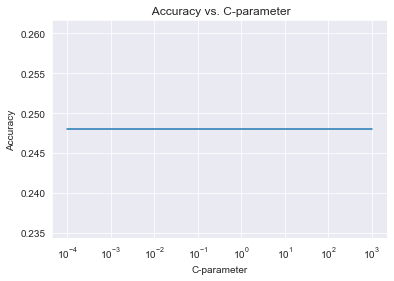

In [46]:
import matplotlib.pyplot as plot
plt.title(' Accuracy vs. C-parameter')
plt.xlabel('C-parameter')
plt.ylabel('Accuracy')
plt.plot(C,accuraies_svm)
plt.semilogx()
plt.show()

In [48]:
#Add regularization term 
accuraies_l = []
C=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
for i in C :
  LSVCClf_l = LinearSVC(penalty="l1",dual = False, random_state =None,  multi_class = 'ovr',C = i,max_iter=5000)
  LSVCClf_l.fit(new_x_train, y_train)
  y_pred_l=LSVCClf.predict(new_x_test)
  accuraies_l.append(accuracy_score(y_test,y_pred_l))

C:\Users\nadai\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nadai\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nadai\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nadai\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [53]:
accuraies_l

[0.248, 0.248, 0.248, 0.248, 0.248, 0.248, 0.248, 0.248]

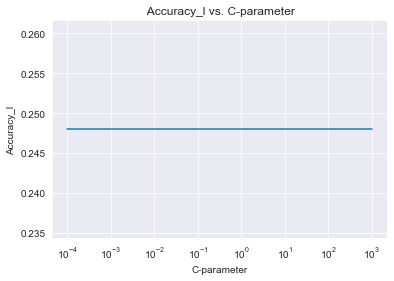

In [49]:
import matplotlib.pyplot as plot
plt.title(' Accuracy_l vs. C-parameter')
plt.xlabel('C-parameter')
plt.ylabel('Accuracy_l')
plt.plot(C,accuraies_l)
plt.semilogx()
plt.show()

In [50]:
#final  experiment 
from sklearn.svm import SVC
accuraies_e=[]
C_1= [0.01, 0.1, 1, 10, 100]
gamma=[0.01, 0.1, 1, 10, 100]
for i in C_1 :
    for x in gamma:
      LSVCClf_e = SVC(C = i, kernel='rbf',gamma= x)
      LSVCClf_e.fit(new_x_train, y_train)
      y_pred_e=LSVCClf.predict(new_x_test)
      accuraies_e.append(accuracy_score(y_test,y_pred_e))

In [54]:
accuraies_e

[0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248,
 0.248]

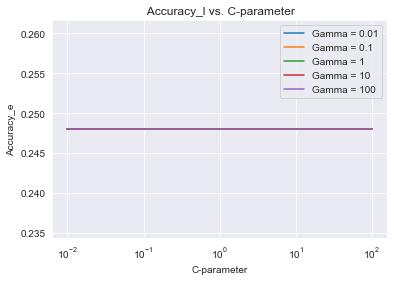

In [51]:
plt.title(' Accuracy_l vs. C-parameter')
plt.xlabel('C-parameter')
plt.ylabel('Accuracy_e')
nada = 0
m=5
for i in gamma:
  plt.plot(C_1,accuraies_e[nada :nada + m ],label = 'Gamma = {}'.format(i))
  nada +=5 
  if nada == 25 :
    break
plt.legend()
plt.semilogx()
plt.show()

## Part 4. Write a Conclusion (1 Mark)

Write a conclusion comparing the results from each part of the assignment. Comment on the suitability of each method for this task.

Due to technical issue  therefore I needed  to run by sample from data
 that lea to same accuracy in svm but we add  C and gamma which have effect on accuracy  the accuracy increase from  23% to 28% that for SVM
  for Logistics accuracy was 24%
 for KNN after I chose  k=7   depend on the graph and give us accuracy 15%
  and in my opinion to improve accuracy of logistic and knn  we can make standardscaler


<!-- Write your conclusion here -->